In [1]:
from circuit_formatter import CircuitPNGFormatter

# What are Graphical States?

Daniel Knüttel 2020

## The Technical Point of View

We know from (*PHYSICAL REVIEW A70, 052328(2004)*) that all circuits containing only $S, H, CX$ can be simulated in polynomial time. One can show that there are (up to a global phase) $24$ one-qbit gates that can be generated by $S,H$.

Note further:

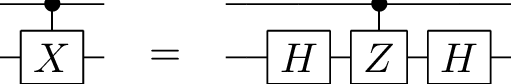

In [2]:
CircuitPNGFormatter(r'''
\Qcircuit @C=.5em @R=0em @!R {
& \ctrl{1} & \qw &            &                             & \qw &   \qw &        \ctrl{1} & \qw      & \qw \\
& \gate{X} & \qw & \push{\rule{.3em}{0em}=\rule{.3em}{0em}} & & \qw & \gate{H} & \gate{Z} & \gate{H} & \qw \\
}
''')

Usually one starts from the state $|0\rangle^{\otimes n}$ and starts to apply the gates.
**Question**: Can we (by switching from the starting state $|0\rangle^{\otimes n}$ to a different starting state) bring a general circuit to a form similar to this?

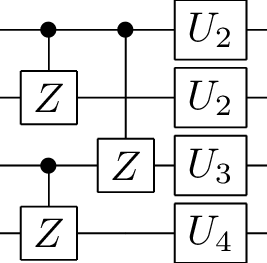

In [3]:
CircuitPNGFormatter(r'''
\Qcircuit @C=.5em @R=.2em {
& \ctrl{1} & \ctrl{2} & \gate{U_2} & \qw \\
& \gate{Z} &  \qw     & \gate{U_2} & \qw \\
& \ctrl{1} & \gate{Z} & \gate{U_3} & \qw \\
& \gate{Z} & \qw      & \gate{U_4} & \qw \\
}
''')

**Answer**: Yes. We use the starting state $|+\rangle^{\otimes n}$. We then commute all the $CZ$s in the circuit to the left and are left with single-qbit gates on the right.

We are left with the following problems: *How can we efficiently represent the state?* and *How do we measure on this state?*

The first question is easy to answer: we define the state as

$$ |G\rangle = \left(\prod\limits_{U_i \in O} U_i\right) \left(\prod\limits_{\{i,j\} \in E} CZ_{i,j} \right) |+\rangle^{\otimes n}. \tag*{(A)}$$

Where $O$ is a set of single-qbit operators and $E$ is a set of edges of a mathematical graph. This also explains the name *Graphical State*. One can show rules how $O$ and $E$ transform under $H, S, CZ$. The transformations can be computed in polynomial time.

To answer the second question we have to go a bit deeper into stabilizer theory.

## A Theoretical Point of View

We have defined the graphical states in (A). One can show using some algebra that for the operators

$$ K_G^{(i)} = \left(\prod\limits_{U_i \in O} U_i\right)X_i \left(\prod\limits_{\{i,j\} \in E} Z_j\right)\left(\prod\limits_{U_i \in O} U_i\right)^\dagger \tag*{(B)}$$

the state $|G\rangle$ is the $+1$ eigenstate of these operators:

$$ K_G^{(i)} |G\rangle = +1 |G\rangle \tag*{(C)}$$

Further one can show that the $K_G^{(i)}$ are tensor products of Pauli operators. When measuring a Pauli observable $M \in \{\pm X, \pm Y, \pm Z\}$ it is sufficient to study 

1. The commutator relationships of $K_G^{(i)}$ with $M$ to determine the probability amplitudes.
2. How $K_G^{(i)}$ transforms under $\frac{1}{4} (I \pm M) K_G^{(i)} (I \pm M)$ to update the state after the measurement.

This can be done in polynomial time.